<a href="https://colab.research.google.com/github/nalrob/Aprendizaje-Automatico/blob/main/CTRCD_Modelos_lastversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn==0.24.2  # versión compatible con eli5
!pip install eli5==0.11.0  # última versión conocida estable


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.1 MB/s eta 0:00:00


In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score,
                             f1_score, precision_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils.metaestimators import available_if

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt



In [3]:
from google.colab import files
uploaded= files.upload()

Saving cardiotox.zip to cardiotox.zip


In [4]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['cardiotox.zip']),'r')
data.extractall()

In [313]:
### SOLO historial clinico

import pandas as pd

def import_data(from_file):
    results = []
    titles = []

    try:
        with open(from_file, 'r') as archivo:
            lineas = archivo.readlines()

            # Process the first line to extract titles
            titles = lineas[0].strip().split(';')

            # Process the missing lines
            for linea in lineas[1:]:
                values = linea.strip().split(';')
                result_iteration = process_values(values)
                results.append(result_iteration)

    except FileNotFoundError:
        print(f"Error: El archivo {from_file} no fue encontrado.")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {str(e)}")
        return None

    # Create a dataframe w results & add titles
    df_var = pd.DataFrame(results, columns=titles[:27])
    return df_var

def process_values(values):
    # Devolver los valores de las 27 primeras columnas
    return values[:27]

file = '/content/BC_cardiotox_clinical_and_functional_variables.csv'
df = import_data(file)
df

,heart_rate,age,weight,height,CTRCD,time,heart_rhythm,LVEF,PWT,LAd,...,smoker,exsmoker,ACprev,antiHER2prev,RTprev,CIprev,ICMprev,ARRprev,VALVprev,cxvalv
0,103,58,58,151,1,619,0,"60,24096386","0,8","3,8",...,,,,,,,,,,
1,94,75,66,150,0,1884,0,"66,27403031","1,093170204","3,463273568",...,0,0,0,0,0,0,0,0,0,0
2,96,53,55,149,0,1830,0,70,"0,661084178","2,894431584",...,,,,,,,,,,
3,58,67,50,"162,5",1,820,0,"56,54077998","0,798487967","3,439739698",...,,,,,,,,,,
4,76,59,70,159,0,2276,0,"67,21281916","0,73427974","2,698600354",...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,69,40,58,"158,5",0,392,0,"67,34021706","0,849898211","2,604906554",...,0,0,0,0,0,0,0,0,0,0
527,77,42,102,163,0,538,0,"73,55165001","1,020905154","2,263032997",...,0,0,0,0,0,0,0,0,0,0
528,80,45,63,171,0,2027,0,"74,78422784","0,808679193","3,376373508",...,0,0,0,0,0,0,0,0,0,0
529,91,53,69,150,0,679,0,"60,81284513","1,078942241","2,571179447",...,,,,,,,,,,


In [314]:
df = df.apply(pd.to_numeric, errors='coerce')
df.shape

(531, 27)

In [315]:
df.fillna(0, inplace=True)
df.shape

(531, 27)

In [316]:
#TEST CARDIOTOX
data = df[(df['AC'] == 1) | (df['antiHER2'] == 1)]
#data['cardiotox'] = ((data['AC'] == 1) | (data['antiHER2'] == 1)).astype(int)
data.shape

(446, 27)

In [317]:
data.columns

Index(['heart_rate', 'age', 'weight', 'height', 'CTRCD', 'time',
       'heart_rhythm', 'LVEF', 'PWT', 'LAd', 'LVDd', 'LVSd', 'AC', 'antiHER2',
       'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev',
       'RTprev', 'CIprev', 'ICMprev', 'ARRprev', 'VALVprev', 'cxvalv'],
      dtype='object')

In [318]:
#feature_names = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd', 'antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']
#data = data.drop(columns=['heart_rhythm', 'LVEF','LAd', 'LVDd', 'LVSd','DM','exsmoker','VALVprev','CIprev', 'ICMprev', 'ARRprev', 'VALVprev', 'cxvalv'])

data = data.drop(columns=['heart_rhythm', 'LVDd','VALVprev','CIprev', 'ICMprev', 'ARRprev', 'VALVprev', 'cxvalv','LAd', 'LVSd'])
feature_names = ['heart_rate', 'age', 'weight', 'height', 'time','LVEF','PWT', 'AC', 'antiHER2', 'antiHER2prev', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

X=data[feature_names]
y=data['CTRCD']


In [342]:
numeric_columns = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT']
binary_columns = ['antiHER2', 'antiHER2prev', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'AC', 'ACprev', 'RTprev']

# Filtrar solo los pacientes de clase 0 (en X y y)
X_0 = X[y == 0]
y_0 = y[y == 0]

# Calcular el IQR para cada columna numérica en la clase 0
Q1 = X_0[numeric_columns].quantile(0.25)
Q3 = X_0[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers en la clase 0 para las columnas numéricas
# Asegúrate de aplicar el filtrado correctamente a cada columna numérica
X_0_filtered = X_0[~((X_0[numeric_columns] < lower_bound) | (X_0[numeric_columns] > upper_bound)).any(axis=1)]

# Eliminar las filas correspondientes en y_0 para que estén alineados con X_0_filtered
y_0_filtered = y_0[X_0_filtered.index]

# Volver a combinar con la clase 1 para mantener la estructura original (si es necesario)
X_1 = X[y == 1]
y_1 = y[y == 1]

# Concatenar las clases sin outliers
X = pd.concat([X_0_filtered, X_1])
y = pd.concat([y_0_filtered, y_1])

# Verificar que las dimensiones de X_filtered y y_filtered coincidan
print(f"X_filtered shape: {X.shape}")
print(f"y_filtered shape: {y.shape}")

# Si deseas mantener el dataframe original sin outliers, puedes concatenar X_filtered y y_filtered
df_filtered = pd.concat([X, y], axis=1)

# Mostrar el tamaño del dataframe final
print(f"Dataframe final shape: {df_filtered.shape}")


X_filtered shape: (303, 18)
y_filtered shape: (303,)
Dataframe final shape: (303, 19)


In [343]:
X['CTRCD'].value_counts()

,count
CTRCD,
0,257
1,46


In [336]:
#TEST FEATURE SELECTION
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_names = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd', 'antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']

# Dividir en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo inicial de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Selección de características
selector = SelectFromModel(rf, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Entrenar nuevo modelo con características seleccionadas
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluar accuracy
y_pred = rf_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy después de selección de características: {accuracy:.4f}')

# Mostrar características seleccionadas
selected_features = X.columns[selector.get_support()]
selected_features

ValueError: Found input variables with inconsistent numbers of samples: [314, 446]

In [321]:
X.columns

Index(['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'AC',
       'antiHER2', 'antiHER2prev', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker',
       'ACprev', 'RTprev', 'CTRCD'],
      dtype='object')

**1. Random Forest**

In [345]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT']
ohe = ['antiHER2', 'antiHER2prev', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'AC', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=5,
        min_samples_leaf=4,
        max_features='sqrt',
        class_weight='balanced'  # Ajusta el peso de las clases automáticamente
    ))
])


# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Listas para almacenar resultados generales
all_y_test = []
all_y_pred = []
all_y_pred_proba = []  # Agregado para curva ROC

# Umbral de clasificación ajustado
threshold = 0.5  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestreo balanceado de clases
    #sample_size = min(sum(y_train_fold == 0), sum(y_train_fold == 1), 25)  # Evita errores si hay pocas muestras
    sample_size = 35
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)
    all_y_pred_proba.extend(y_pred_proba)  # Para curva ROC

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Mostrar los resultados de métricas
print("\nResultados para Random Forest:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")




Resultados para Random Forest:
Promedio Accuracy: 0.70
Promedio ROC AUC: 0.76
Promedio Recall: 0.67
Promedio F1 Score: 0.40
Promedio Precision: 0.29

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.74, ROC AUC: 0.96, Recall: 1.00, F1 Score: 0.56, Precision: 0.38
Grupo 2 - Accuracy: 0.68, ROC AUC: 0.82, Recall: 0.80, F1 Score: 0.44, Precision: 0.31
Grupo 3 - Accuracy: 0.68, ROC AUC: 0.73, Recall: 0.80, F1 Score: 0.44, Precision: 0.31
Grupo 4 - Accuracy: 0.60, ROC AUC: 0.66, Recall: 0.50, F1 Score: 0.25, Precision: 0.17
Grupo 5 - Accuracy: 0.67, ROC AUC: 0.67, Recall: 0.50, F1 Score: 0.29, Precision: 0.20
Grupo 6 - Accuracy: 0.80, ROC AUC: 0.84, Recall: 1.00, F1 Score: 0.57, Precision: 0.40
Grupo 7 - Accuracy: 0.73, ROC AUC: 0.77, Recall: 0.50, F1 Score: 0.33, Precision: 0.25
Grupo 8 - Accuracy: 0.63, ROC AUC: 0.72, Recall: 0.60, F1 Score: 0.35, Precision: 0.25
Grupo 9 - Accuracy: 0.70, ROC AUC: 0.70, Recall: 0.60, F1 Score: 0.40, Precision: 0.30
Grupo 10 - Accuracy: 0.73, ROC AUC: 0.68

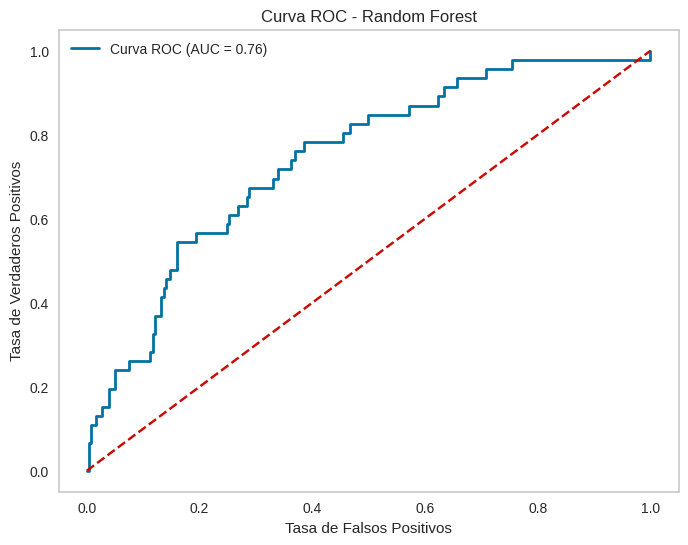

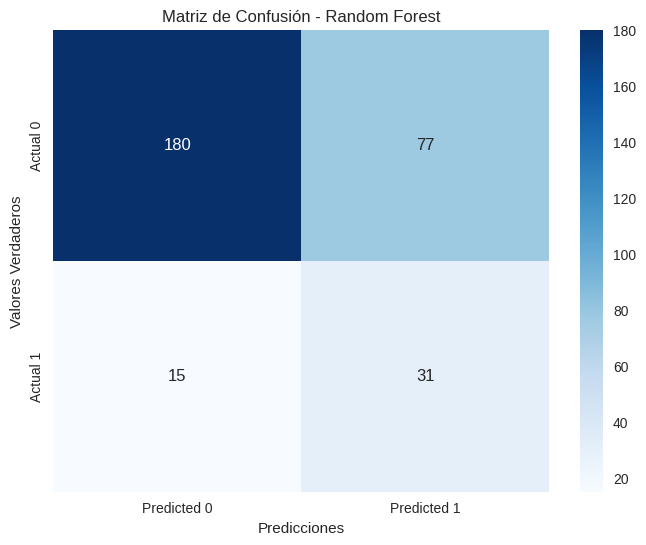

In [346]:
# Curva ROC total
fpr, tpr, _ = roc_curve(all_y_test, all_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {np.mean(metrics["roc_auc"]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curva ROC - Random Forest')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión
final_cm_test = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

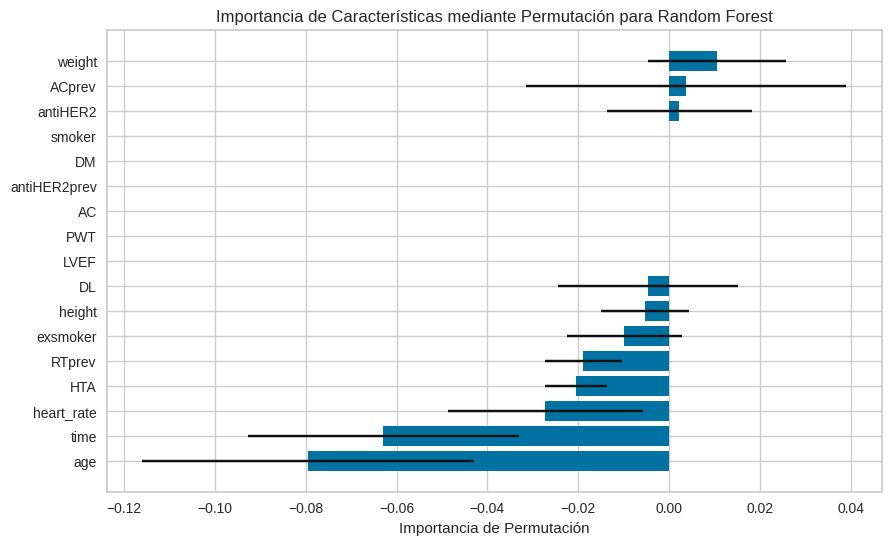

In [200]:
perm_importance = permutation_importance(model, X_test_fold, y_test_fold, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Random Forest")
plt.show()

**2. Naive Bayes**

In [203]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT']
ohe = ['antiHER2', 'antiHER2prev', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'AC', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GaussianNB(var_smoothing=1e-1))])


# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Listas para almacenar resultados generales
all_y_test = []
all_y_pred = []
all_y_pred_proba = []  # Agregado para curva ROC

# Umbral de clasificación ajustado
threshold = 0.5  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestreo balanceado de clases
    #sample_size = min(sum(y_train_fold == 0), sum(y_train_fold == 1), 25)  # Evita errores si hay pocas muestras
    sample_size = 35
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)
    all_y_pred_proba.extend(y_pred_proba)  # Para curva ROC

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Mostrar los resultados de métricas
print("\nResultados para Random Forest:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")




Resultados para Random Forest:
Promedio Accuracy: 0.78
Promedio ROC AUC: 0.70
Promedio Recall: 0.39
Promedio F1 Score: 0.27
Promedio Precision: 0.21

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.80, ROC AUC: 0.59, Recall: 0.40, F1 Score: 0.31, Precision: 0.25
Grupo 2 - Accuracy: 0.84, ROC AUC: 0.91, Recall: 0.80, F1 Score: 0.53, Precision: 0.40
Grupo 3 - Accuracy: 0.73, ROC AUC: 0.82, Recall: 0.60, F1 Score: 0.33, Precision: 0.23
Grupo 4 - Accuracy: 0.78, ROC AUC: 0.67, Recall: 0.20, F1 Score: 0.17, Precision: 0.14
Grupo 5 - Accuracy: 0.80, ROC AUC: 0.58, Recall: 0.20, F1 Score: 0.18, Precision: 0.17
Grupo 6 - Accuracy: 0.82, ROC AUC: 0.83, Recall: 0.40, F1 Score: 0.33, Precision: 0.29
Grupo 7 - Accuracy: 0.61, ROC AUC: 0.49, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 8 - Accuracy: 0.82, ROC AUC: 0.62, Recall: 0.25, F1 Score: 0.20, Precision: 0.17
Grupo 9 - Accuracy: 0.82, ROC AUC: 0.77, Recall: 0.50, F1 Score: 0.33, Precision: 0.25
Grupo 10 - Accuracy: 0.75, ROC AUC: 0.75

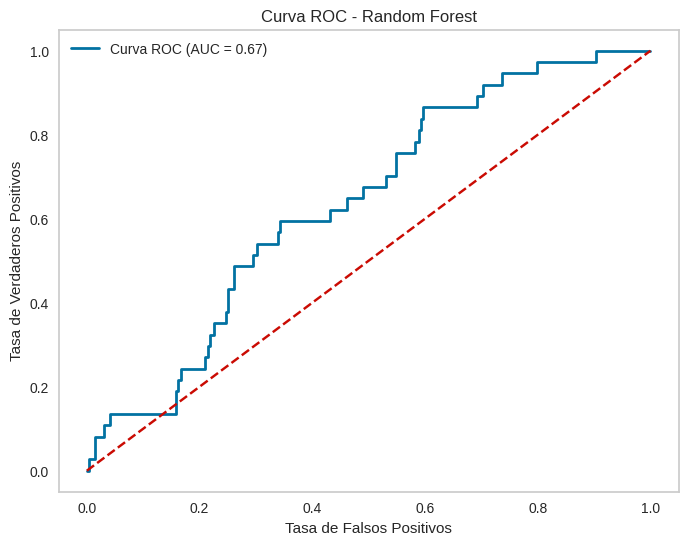

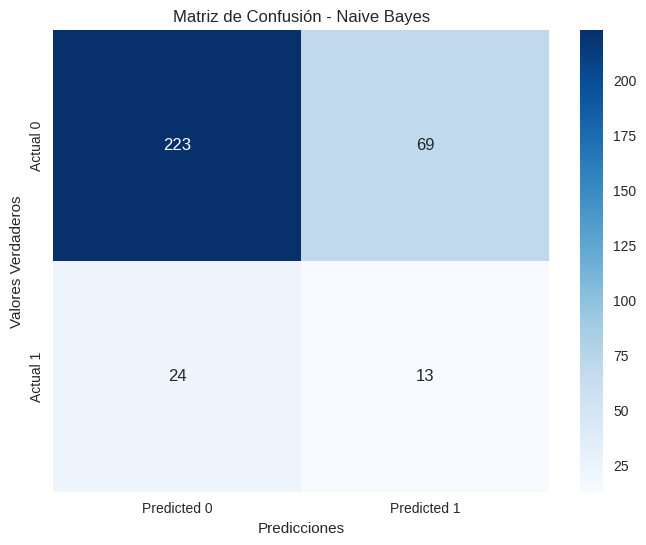

In [46]:
# Curva ROC total
fpr, tpr, _ = roc_curve(all_y_test, all_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {np.mean(metrics["roc_auc"]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curva ROC - Random Forest')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión
final_y_pred = [1 if p >= 0.5 else 0 for p in all_y_pred_proba]
final_cm_test = confusion_matrix(all_y_test, final_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

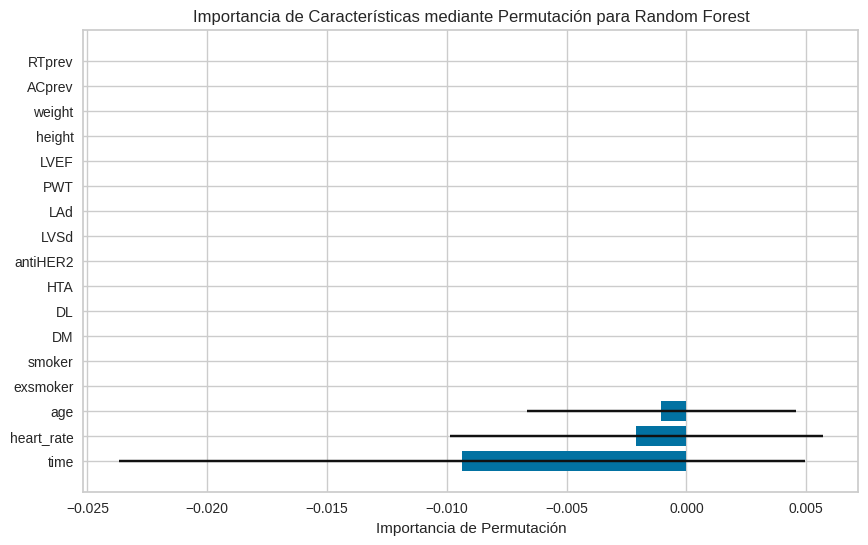

In [47]:
perm_importance = permutation_importance(model, X_test_fold, y_test_fold, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Random Forest")
plt.show()

**3. KNN**

In [95]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo K-Nearest Neighbors (KNN)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])  # Puedes ajustar el número de vecinos

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

all_y_test = []
all_y_pred = []

# Umbral de clasificación ajustado
threshold = 0.7 # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Promediar TPR y calcular la curva ROC
mean_tpr /= n_groups  # Promedio de TPR para cada grupo

# Mostrar los resultados de métricas
print("\nResultados para K-Nearest Neighbors (KNN):")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para K-Nearest Neighbors (KNN):
Promedio Accuracy: 0.79
Promedio ROC AUC: 0.64
Promedio Recall: 0.23
Promedio F1 Score: 0.22
Promedio Precision: 0.22

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.73, ROC AUC: 0.53, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 2 - Accuracy: 0.76, ROC AUC: 0.58, Recall: 0.25, F1 Score: 0.20, Precision: 0.17
Grupo 3 - Accuracy: 0.76, ROC AUC: 0.37, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 4 - Accuracy: 0.91, ROC AUC: 0.78, Recall: 0.50, F1 Score: 0.57, Precision: 0.67
Grupo 5 - Accuracy: 0.97, ROC AUC: 0.90, Recall: 0.75, F1 Score: 0.86, Precision: 1.00
Grupo 6 - Accuracy: 0.76, ROC AUC: 0.69, Recall: 0.25, F1 Score: 0.20, Precision: 0.17
Grupo 7 - Accuracy: 0.67, ROC AUC: 0.66, Recall: 0.25, F1 Score: 0.15, Precision: 0.11
Grupo 8 - Accuracy: 0.82, ROC AUC: 0.78, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 9 - Accuracy: 0.73, ROC AUC: 0.68, Recall: 0.33, F1 Score: 0.18, Precision: 0.12
Grupo 10 - Accuracy: 0.84, R

In [46]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo K-Nearest Neighbors
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Contar las muestras por clase en el conjunto de entrenamiento
    class_counts = y_train_fold.value_counts()
    class_0_count = class_counts.get(0, 0)
    class_1_count = class_counts.get(1, 0)

    # Determinar el tamaño de la muestra para cada clase
    sample_size = 25

    # Muestrear las clases con el tamaño determinado
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular y mostrar el promedio de métricas
print("\nResultados para K-Nearest Neighbors:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")



Resultados para K-Nearest Neighbors:
Promedio Accuracy: 0.65
Promedio ROC AUC: 0.64
Promedio Recall: 0.62
Promedio F1 Score: 0.29
Promedio Precision: 0.19


**4. Logistic Regression**

In [24]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo Regresión Logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(
                            random_state=42,
                            max_iter=1000,
                            solver='liblinear'))])  # Puedes ajustar el solver si es necesario

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

all_y_test = []
all_y_pred = []

# Umbral de clasificación ajustado
threshold = 0.6  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Promediar TPR y calcular la curva ROC
mean_tpr /= n_groups  # Promedio de TPR para cada grupo

# Mostrar los resultados de métricas
print("\nResultados para Regresión Logística:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para Regresión Logística:
Promedio Accuracy: 0.75
Promedio ROC AUC: 0.69
Promedio Recall: 0.56
Promedio F1 Score: 0.34
Promedio Precision: 0.25

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.70, ROC AUC: 0.57, Recall: 0.25, F1 Score: 0.17, Precision: 0.12
Grupo 2 - Accuracy: 0.82, ROC AUC: 0.78, Recall: 0.75, F1 Score: 0.50, Precision: 0.38
Grupo 3 - Accuracy: 0.73, ROC AUC: 0.71, Recall: 0.75, F1 Score: 0.40, Precision: 0.27
Grupo 4 - Accuracy: 0.73, ROC AUC: 0.87, Recall: 1.00, F1 Score: 0.47, Precision: 0.31
Grupo 5 - Accuracy: 0.88, ROC AUC: 0.75, Recall: 0.75, F1 Score: 0.60, Precision: 0.50
Grupo 6 - Accuracy: 0.73, ROC AUC: 0.70, Recall: 0.50, F1 Score: 0.31, Precision: 0.22
Grupo 7 - Accuracy: 0.64, ROC AUC: 0.47, Recall: 0.25, F1 Score: 0.14, Precision: 0.10
Grupo 8 - Accuracy: 0.76, ROC AUC: 0.60, Recall: 0.33, F1 Score: 0.20, Precision: 0.14
Grupo 9 - Accuracy: 0.64, ROC AUC: 0.69, Recall: 0.67, F1 Score: 0.25, Precision: 0.15
Grupo 10 - Accuracy: 0.88, ROC AUC

In [49]:
#ULTIMO CODIGO
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo de Regresión Logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Número de grupos para la validación cruzada
n_groups = 15

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Contar las muestras por clase en el conjunto de entrenamiento
    class_counts = y_train_fold.value_counts()
    class_0_count = class_counts.get(0, 0)
    class_1_count = class_counts.get(1, 0)

    # Determinar el tamaño de la muestra para cada clase
    sample_size = 25

    # Muestrear las clases con el tamaño determinado
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Contar las muestras por clase después del balanceo
    balanced_class_counts = y_train_balanced.value_counts()
    balanced_class_0_count = balanced_class_counts.get(0, 0)
    balanced_class_1_count = balanced_class_counts.get(1, 0)

    # Imprimir las cantidades de cada clase antes y después del balanceo
   # print(f"Grupo {group_index + 1}:")
   # print(f"- Clase 0: {balanced_class_0_count}, Clase 1: {balanced_class_1_count}")

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
    mean_tpr = np.interp(np.linspace(0, 1, 100), fpr, tpr)
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular y mostrar el promedio de métricas
print("\nResultados para Regresión Logística:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")



Resultados para Regresión Logística:
Promedio Accuracy: 0.60
Promedio ROC AUC: 0.62
Promedio Recall: 0.56
Promedio F1 Score: 0.24
Promedio Precision: 0.16


**5. Maquinas de soporte (SVC)**

In [66]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo SVC
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(probability=True, random_state=42))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Contar las muestras por clase en el conjunto de entrenamiento
    class_counts = y_train_fold.value_counts()
    class_0_count = class_counts.get(0, 0)
    class_1_count = class_counts.get(1, 0)

    # Determinar el tamaño de la muestra para cada clase
    sample_size = 25

    # Muestrear las clases con el tamaño determinado
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Contar las muestras por clase después del balanceo
    balanced_class_counts = y_train_balanced.value_counts()
    balanced_class_0_count = balanced_class_counts.get(0, 0)
    balanced_class_1_count = balanced_class_counts.get(1, 0)

    # Imprimir las cantidades de cada clase antes y después del balanceo
 #   print(f"Grupo {group_index + 1}:")
 #   print(f"- Clase 0 en entrenamiento: {balanced_class_0_count}, Clase 1 en entrenamiento: {balanced_class_1_count}")

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
    mean_tpr = np.interp(np.linspace(0, 1, 100), fpr, tpr)
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular y mostrar el promedio de métricas
print("\nResultados para SVC:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")



Resultados para SVC:
Promedio Accuracy: 0.62
Promedio ROC AUC: 0.50
Promedio Recall: 0.66
Promedio F1 Score: 0.28
Promedio Precision: 0.18


# 6.GBM

In [351]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT']
ohe = ['antiHER2', 'antiHER2prev', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'AC', 'ACprev', 'RTprev']


# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

'''
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=200,
        max_depth=4,
        min_samples_leaf=1,
        max_features='sqrt'  # Ajusta el peso de las clases automáticamente
    ))
])

'''

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GradientBoostingClassifier(
                            random_state=42,
                            n_estimators=200,
                            learning_rate=0.05,
                            max_depth=1,
                            subsample=0.8,
                            min_samples_split=2,
                            min_samples_leaf=1))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Listas para almacenar resultados generales
all_y_test = []
all_y_pred = []
all_y_pred_proba = []  # Agregado para curva ROC

# Umbral de clasificación ajustado
threshold = 0.4  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestreo balanceado de clases
    #sample_size = min(sum(y_train_fold == 0), sum(y_train_fold == 1), 25)  # Evita errores si hay pocas muestras
    sample_size = 35
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)
    all_y_pred_proba.extend(y_pred_proba)  # Para curva ROC

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Mostrar los resultados de métricas
print("\nResultados para gbm:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")




Resultados para gbm:
Promedio Accuracy: 0.64
Promedio ROC AUC: 0.74
Promedio Recall: 0.76
Promedio F1 Score: 0.39
Promedio Precision: 0.26

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.71, ROC AUC: 0.98, Recall: 1.00, F1 Score: 0.53, Precision: 0.36
Grupo 2 - Accuracy: 0.68, ROC AUC: 0.88, Recall: 1.00, F1 Score: 0.50, Precision: 0.33
Grupo 3 - Accuracy: 0.68, ROC AUC: 0.75, Recall: 0.80, F1 Score: 0.44, Precision: 0.31
Grupo 4 - Accuracy: 0.70, ROC AUC: 0.73, Recall: 0.50, F1 Score: 0.31, Precision: 0.22
Grupo 5 - Accuracy: 0.60, ROC AUC: 0.67, Recall: 0.75, F1 Score: 0.33, Precision: 0.21
Grupo 6 - Accuracy: 0.57, ROC AUC: 0.69, Recall: 1.00, F1 Score: 0.38, Precision: 0.24
Grupo 7 - Accuracy: 0.77, ROC AUC: 0.68, Recall: 0.50, F1 Score: 0.36, Precision: 0.29
Grupo 8 - Accuracy: 0.57, ROC AUC: 0.78, Recall: 0.80, F1 Score: 0.38, Precision: 0.25
Grupo 9 - Accuracy: 0.60, ROC AUC: 0.67, Recall: 0.80, F1 Score: 0.40, Precision: 0.27
Grupo 10 - Accuracy: 0.57, ROC AUC: 0.54, Recall: 

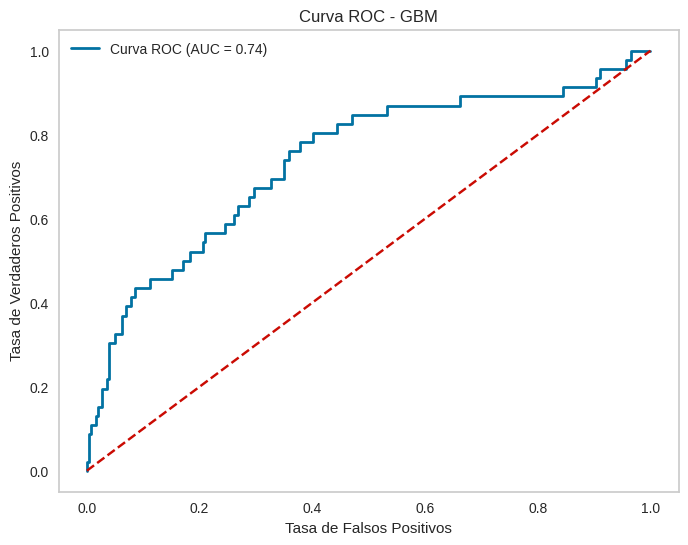

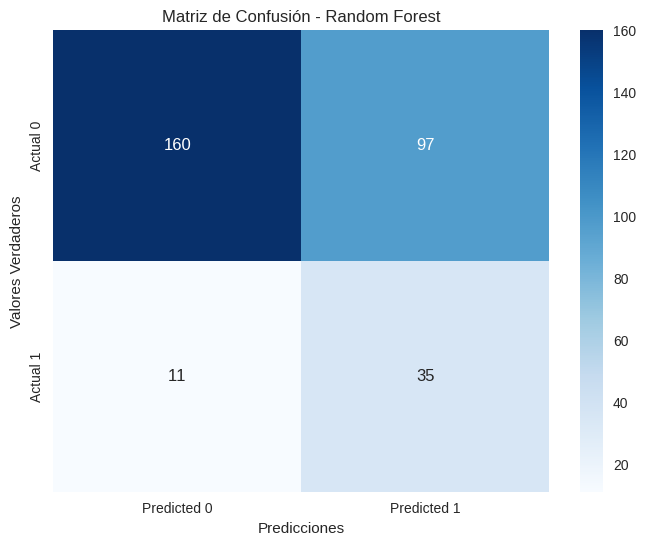

In [353]:
# Curva ROC total
fpr, tpr, _ = roc_curve(all_y_test, all_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {np.mean(metrics["roc_auc"]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curva ROC - GBM')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión
final_cm_test = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

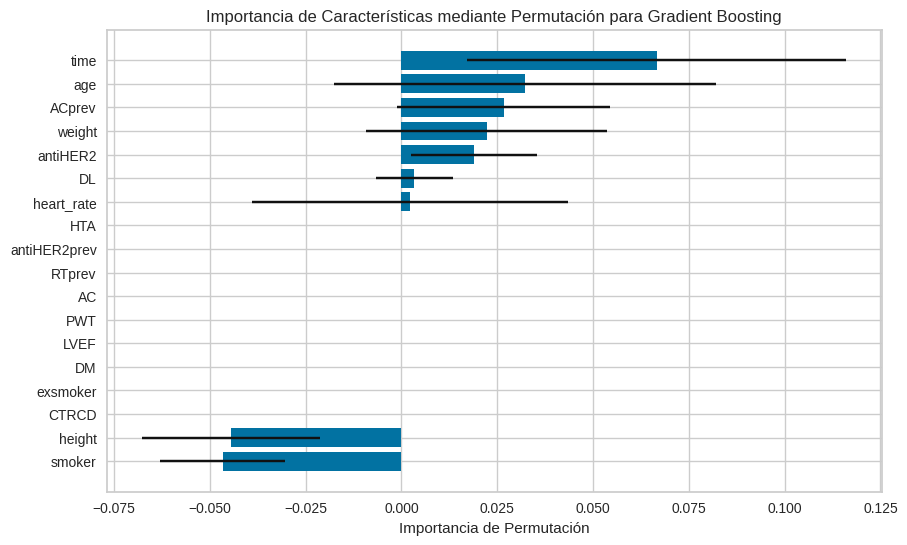

In [354]:
perm_importance = permutation_importance(model, X_test_fold, y_test_fold, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Gradient Boosting")
plt.show()

# 7.xgboost

In [179]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score
from xgboost import XGBClassifier

# Definir columnas a escalar y a codificar
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT']
ohe = ['antiHER2', 'antiHER2prev', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'AC', 'ACprev', 'RTprev']

# Preprocesador de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ohe)  # Evita problemas con scikit-learn
    ])

# Modelo de XGBClassifier
model = XGBClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.5,
    max_depth=1,
    subsample=0.8,
    min_child_weight=1
)

# Número de grupos para validación cruzada
n_groups = 10

# Almacenar métricas y resultados
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Listas para almacenar resultados
all_y_test = []
all_y_pred = []
all_y_pred_proba = []

# Umbral de clasificación ajustado
threshold = 0.5

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Transformar los datos
    X_train_transformed = preprocessor.fit_transform(X_train_fold)
    X_test_transformed = preprocessor.transform(X_test_fold)

    # Muestreo balanceado de clases
    sample_size = min(len(y_train_fold[y_train_fold == 0]), len(y_train_fold[y_train_fold == 1]), 35)

    X_train_class_0_sampled = X_train_transformed[y_train_fold == 0][:sample_size]
    X_train_class_1_sampled = X_train_transformed[y_train_fold == 1][:sample_size]

    y_train_class_0_sampled = y_train_fold[y_train_fold == 0][:sample_size]
    y_train_class_1_sampled = y_train_fold[y_train_fold == 1][:sample_size]

    # Concatenar muestras balanceadas
    X_train_balanced = np.vstack((X_train_class_0_sampled, X_train_class_1_sampled))
    y_train_balanced = np.hstack((y_train_class_0_sampled, y_train_class_1_sampled))

    # Entrenar modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar etiquetas y predicciones
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)
    all_y_pred_proba.extend(y_pred_proba)

    # Calcular métricas
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Mostrar resultados
print("\nResultados para XGBoost:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados por grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para XGBoost:
Promedio Accuracy: 0.57
Promedio ROC AUC: 0.64
Promedio Recall: 0.53
Promedio F1 Score: 0.20
Promedio Precision: 0.13

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.58, ROC AUC: 0.63, Recall: 0.60, F1 Score: 0.24, Precision: 0.15
Grupo 2 - Accuracy: 0.53, ROC AUC: 0.62, Recall: 0.60, F1 Score: 0.22, Precision: 0.14
Grupo 3 - Accuracy: 0.56, ROC AUC: 0.90, Recall: 1.00, F1 Score: 0.33, Precision: 0.20
Grupo 4 - Accuracy: 0.58, ROC AUC: 0.81, Recall: 0.80, F1 Score: 0.30, Precision: 0.18
Grupo 5 - Accuracy: 0.56, ROC AUC: 0.66, Recall: 0.40, F1 Score: 0.17, Precision: 0.11
Grupo 6 - Accuracy: 0.73, ROC AUC: 0.60, Recall: 0.40, F1 Score: 0.25, Precision: 0.18
Grupo 7 - Accuracy: 0.55, ROC AUC: 0.67, Recall: 0.50, F1 Score: 0.17, Precision: 0.10
Grupo 8 - Accuracy: 0.55, ROC AUC: 0.39, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 9 - Accuracy: 0.57, ROC AUC: 0.57, Recall: 0.50, F1 Score: 0.17, Precision: 0.11
Grupo 10 - Accuracy: 0.50, ROC AUC: 0.58, Reca